In [1]:
#Vamos a calcular la D_kl y los índices de robustez


In [1]:
import graficas as g
import numpy as np
import entropia as en
import time
import matplotlib.pyplot as plt
import importlib

In [2]:
importlib.reload(en)
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [3]:
num_simulaciones = 5

In [6]:
N = 1000

DKL_BA_fallos=[]
DKL_WS_fallos=[]
inicio = time.time()

for i in range(num_simulaciones):
    print(f"Vamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    P_BA = g.obtener_distribucion_1(G_BA)
    P_WS = g.obtener_distribucion_1(G_WS)
    DKL_BA = []
    DKL_WS = []

    G_1 = G_BA.copy()
    G_2 = G_WS.copy()

    n_BA=[]#Lista que va a almacenar los nodos que se fueron quitando para completar la distribución en orden
    n_WS=[]
    
    for j in range(N):
        #print(f"Vamos en la iteración: {i}")
        G_1,nodo_BA = g.ataques(G_1,'random')
        G_2,nodo_WS = g.ataques(G_2,'random')
        n_BA.append(nodo_BA)
        n_WS.append(nodo_WS)
        Q_BA = g.obtener_distribucion_1(G_1)
        Q_WS = g.obtener_distribucion_1(G_2)
        DKL_BA.append(en.DKL_1(P_BA,Q_BA,n_BA))
        DKL_WS.append(en.DKL_1(P_WS,Q_WS,n_WS))
    DKL_BA_fallos.append(DKL_BA)
    DKL_WS_fallos.append(DKL_WS)
    
final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

Vamos en la 0 simulación
Vamos en la 1 simulación
Vamos en la 2 simulación
Vamos en la 3 simulación
Vamos en la 4 simulación
El tiempo de ejecución fue de: 2030.741629600525


In [7]:
N = 1000

DKL_BA_ataques=[]
DKL_WS_ataques=[]
inicio = time.time()

for i in range(num_simulaciones):
    print(f"Vamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    P_BA = g.obtener_distribucion_1(G_BA)
    P_WS = g.obtener_distribucion_1(G_WS)
    DKL_BA = []
    DKL_WS = []

    G_1 = G_BA.copy()
    G_2 = G_WS.copy()

    n_BA=[]#Lista que va a almacenar los nodos que se fueron quitando para completar la distribución en orden
    n_WS=[]
    
    for j in range(N):
        #print(f"Vamos en la iteración: {i}")
        G_1,nodo_BA = g.ataques(G_1,'degree')
        G_2,nodo_WS = g.ataques(G_2,'degree')
        n_BA.append(nodo_BA)
        n_WS.append(nodo_WS)
        Q_BA = g.obtener_distribucion_1(G_1)
        Q_WS = g.obtener_distribucion_1(G_2)
        DKL_BA.append(en.DKL_1(P_BA,Q_BA,n_BA))
        DKL_WS.append(en.DKL_1(P_WS,Q_WS,n_WS))
    DKL_BA_ataques.append(DKL_BA)
    DKL_WS_ataques.append(DKL_WS)
    
final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

Vamos en la 0 simulación
Vamos en la 1 simulación
Vamos en la 2 simulación
Vamos en la 3 simulación
Vamos en la 4 simulación
El tiempo de ejecución fue de: 1965.6524512767792


In [8]:
DKL_BA_1_fallos = [sum(col)/num_simulaciones for col in zip(*DKL_BA_fallos)]
DKL_WS_1_fallos = [sum(col)/num_simulaciones for col in zip(*DKL_WS_fallos)]

DKL_BA_1_ataques = [sum(col)/num_simulaciones for col in zip(*DKL_BA_ataques)]
DKL_WS_1_ataques = [sum(col)/num_simulaciones for col in zip(*DKL_WS_ataques)]

In [9]:
N = 1000

DKL_BA_fallos=[]
DKL_WS_fallos=[]
inicio = time.time()

for i in range(num_simulaciones):
    print(f"Vamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    P_BA = g.obtener_distribucion_2(G_BA)
    P_WS = g.obtener_distribucion_2(G_WS)
    DKL_BA = []
    DKL_WS = []

    G_1 = G_BA.copy()
    G_2 = G_WS.copy()

    n_BA=[]#Lista que va a almacenar los nodos que se fueron quitando para completar la distribución en orden
    n_WS=[]
    
    for j in range(N):
        #print(f"Vamos en la iteración: {i}")
        G_1,nodo_BA = g.ataques(G_1,'random')
        G_2,nodo_WS = g.ataques(G_2,'random')
        n_BA.append(nodo_BA)
        n_WS.append(nodo_WS)
        Q_BA = g.obtener_distribucion_2(G_1)
        Q_WS = g.obtener_distribucion_2(G_2)
        DKL_BA.append(en.DKL_1(P_BA,Q_BA,n_BA))
        DKL_WS.append(en.DKL_1(P_WS,Q_WS,n_WS))
    DKL_BA_fallos.append(DKL_BA)
    DKL_WS_fallos.append(DKL_WS)
    
final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

Vamos en la 0 simulación
Vamos en la 1 simulación
Vamos en la 2 simulación
Vamos en la 3 simulación
Vamos en la 4 simulación
El tiempo de ejecución fue de: 2061.137934923172


In [10]:
N = 1000

DKL_BA_ataques=[]
DKL_WS_ataques=[]
inicio = time.time()

for i in range(num_simulaciones):
    print(f"Vamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    P_BA = g.obtener_distribucion_2(G_BA)
    P_WS = g.obtener_distribucion_2(G_WS)
    DKL_BA = []
    DKL_WS = []

    G_1 = G_BA.copy()
    G_2 = G_WS.copy()

    n_BA=[]#Lista que va a almacenar los nodos que se fueron quitando para completar la distribución en orden
    n_WS=[]
    
    for j in range(N):
        #print(f"Vamos en la iteración: {i}")
        G_1,nodo_BA = g.ataques(G_1,'degree')
        G_2,nodo_WS = g.ataques(G_2,'degree')
        n_BA.append(nodo_BA)
        n_WS.append(nodo_WS)
        Q_BA = g.obtener_distribucion_2(G_1)
        Q_WS = g.obtener_distribucion_2(G_2)
        DKL_BA.append(en.DKL_1(P_BA,Q_BA,n_BA))
        DKL_WS.append(en.DKL_1(P_WS,Q_WS,n_WS))
    DKL_BA_ataques.append(DKL_BA)
    DKL_WS_ataques.append(DKL_WS)
    
final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

Vamos en la 0 simulación
Vamos en la 1 simulación
Vamos en la 2 simulación
Vamos en la 3 simulación
Vamos en la 4 simulación
El tiempo de ejecución fue de: 1409.587954044342


In [11]:
DKL_BA_2_fallos = [sum(col)/num_simulaciones for col in zip(*DKL_BA_fallos)]
DKL_WS_2_fallos = [sum(col)/num_simulaciones for col in zip(*DKL_WS_fallos)]

DKL_BA_2_ataques = [sum(col)/num_simulaciones for col in zip(*DKL_BA_ataques)]
DKL_WS_2_ataques = [sum(col)/num_simulaciones for col in zip(*DKL_WS_ataques)]

In [12]:
N = 1000
DKL_BA_fallos=[]
DKL_WS_fallos=[]
inicio = time.time()

for i in range(num_simulaciones):
    print(f"Vamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    P_BA = g.obtener_distribucion_3(G_BA)
    P_WS = g.obtener_distribucion_3(G_WS)
    DKL_BA = []
    DKL_WS = []

    G_1 = G_BA.copy()
    G_2 = G_WS.copy()
    
    for j in range(N):
        #print(f"Vamos en la iteración: {i}")
        G_1,nodo_BA = g.ataques(G_1,'random')
        G_2,nodo_WS = g.ataques(G_2,'random')
        n_BA.append(nodo_BA)
        n_WS.append(nodo_WS)
        Q_BA = g.obtener_distribucion_3(G_1)
        Q_WS = g.obtener_distribucion_3(G_2)
        DKL_BA.append(en.DKL_3(P_BA,Q_BA))
        DKL_WS.append(en.DKL_3(P_WS,Q_WS))
    DKL_BA_fallos.append(DKL_BA)
    DKL_WS_fallos.append(DKL_WS)
    
final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

Vamos en la 0 simulación
Vamos en la 1 simulación
Vamos en la 2 simulación
Vamos en la 3 simulación
Vamos en la 4 simulación
El tiempo de ejecución fue de: 3.29418683052063


In [13]:
N = 1000

DKL_BA_ataques=[]
DKL_WS_ataques=[]
inicio = time.time()

for i in range(num_simulaciones):
    print(f"Vamos en la {i} simulación")
    G_BA = g.crear_grafica('barabasi',1000,15,0)
    G_WS = g.crear_grafica('watts',1000,30,0.5)
    P_BA = g.obtener_distribucion_3(G_BA)
    P_WS = g.obtener_distribucion_3(G_WS)
    DKL_BA = []
    DKL_WS = []

    G_1 = G_BA.copy()
    G_2 = G_WS.copy()
    
    for j in range(N):
        #print(f"Vamos en la iteración: {i}")
        G_1,nodo_BA = g.ataques(G_1,'degree')
        G_2,nodo_WS = g.ataques(G_2,'degree')
        n_BA.append(nodo_BA)
        n_WS.append(nodo_WS)
        Q_BA = g.obtener_distribucion_3(G_1)
        Q_WS = g.obtener_distribucion_3(G_2)
        DKL_BA.append(en.DKL_3(P_BA,Q_BA))
        DKL_WS.append(en.DKL_3(P_WS,Q_WS))
    DKL_BA_ataques.append(DKL_BA)
    DKL_WS_ataques.append(DKL_WS)
    
final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

Vamos en la 0 simulación
Vamos en la 1 simulación
Vamos en la 2 simulación
Vamos en la 3 simulación
Vamos en la 4 simulación
El tiempo de ejecución fue de: 4.390084981918335


In [14]:
DKL_BA_3_fallos = [sum(col)/num_simulaciones for col in zip(*DKL_BA_fallos)]
DKL_WS_3_fallos = [sum(col)/num_simulaciones for col in zip(*DKL_WS_fallos)]

DKL_BA_3_ataques = [sum(col)/num_simulaciones for col in zip(*DKL_BA_ataques)]
DKL_WS_3_ataques = [sum(col)/num_simulaciones for col in zip(*DKL_WS_ataques)]

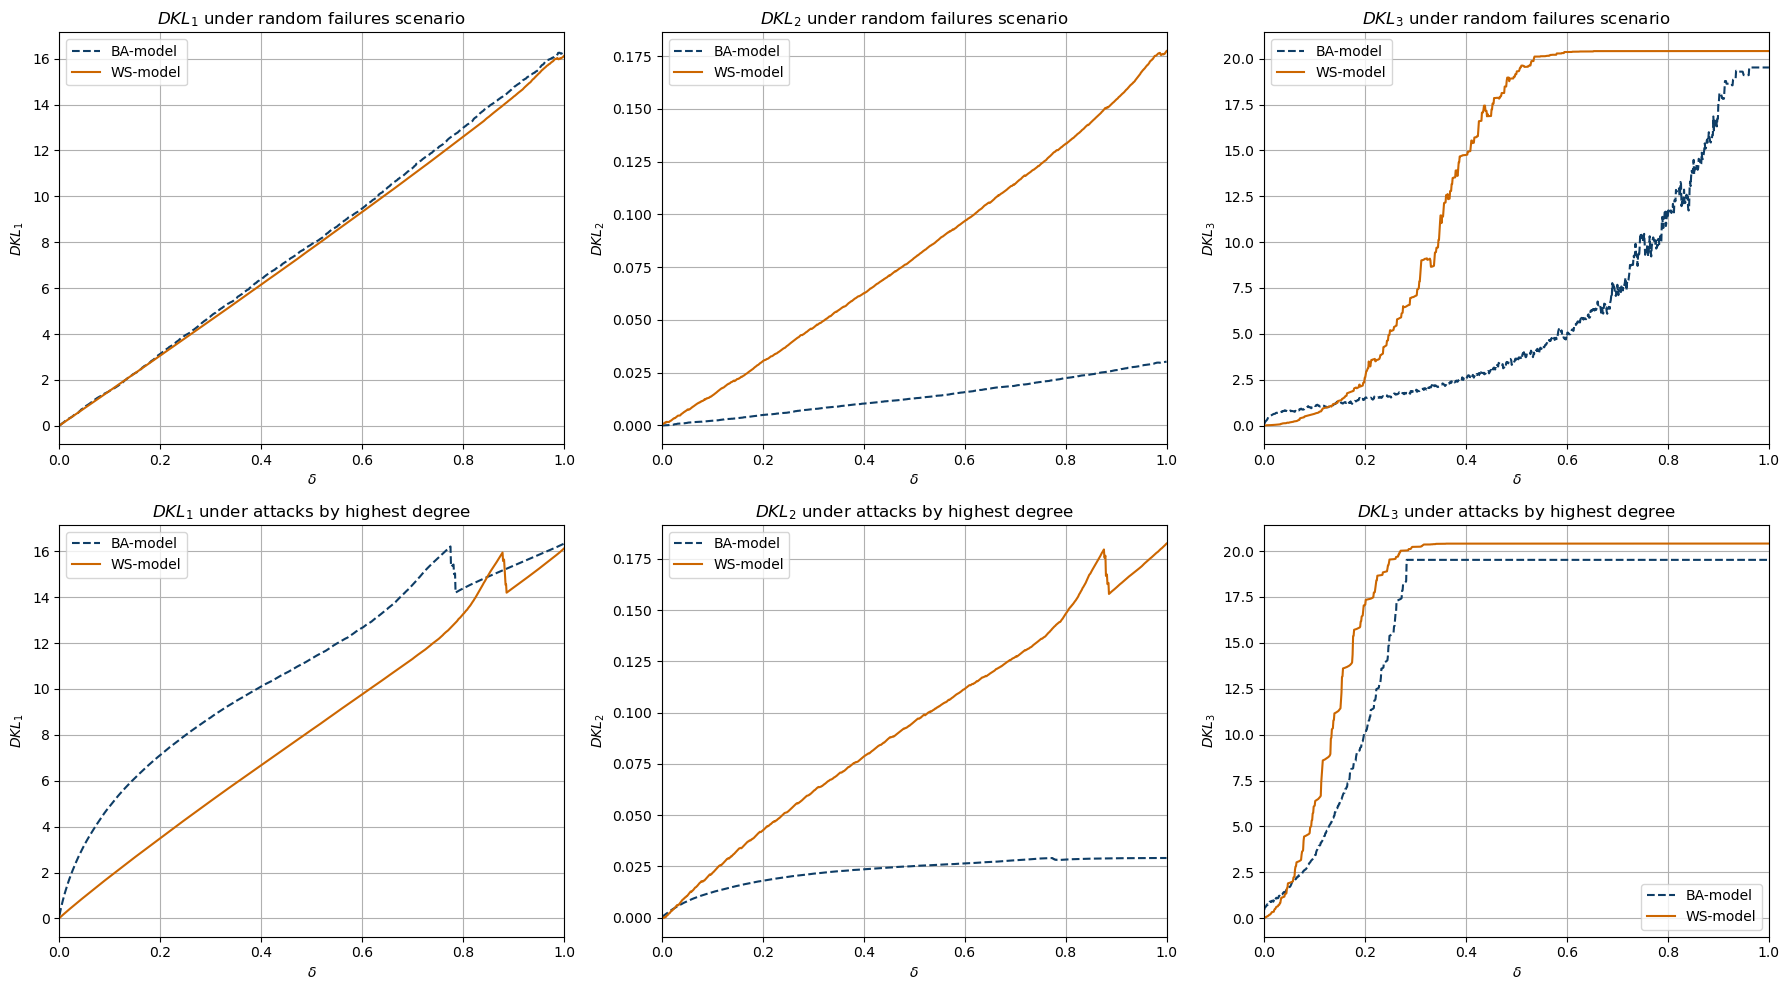

In [15]:
# Colores
blue_dark = "#0e3d66"
orange_dark = "#cc6600"

# Eje X
delta = np.linspace(0, 1, len(DKL_BA_1_fallos))

# Crear figura y ejes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# Datos y títulos organizados por escenario (fallos en la fila 1, ataques en la fila 2)
graficas = [
    (DKL_BA_1_fallos, DKL_WS_1_fallos, r"$DKL_1$ under random failures scenario"),
    (DKL_BA_2_fallos, DKL_WS_2_fallos, r"$DKL_2$ under random failures scenario"),
    (DKL_BA_3_fallos, DKL_WS_3_fallos, r"$DKL_3$ under random failures scenario"),
    (DKL_BA_1_ataques, DKL_WS_1_ataques, r"$DKL_1$ under attacks by highest degree"),
    (DKL_BA_2_ataques, DKL_WS_2_ataques, r"$DKL_2$ under attacks by highest degree"),
    (DKL_BA_3_ataques, DKL_WS_3_ataques, r"$DKL_3$ under attacks by highest degree"),
]

# Generar las gráficas
for i, (ba, ws, titulo) in enumerate(graficas):
    ax = axs[i]
    ax.plot(delta, ba, label="BA-model", color=blue_dark,linestyle='--')
    ax.plot(delta, ws, label="WS-model", color=orange_dark)
    ax.set_title(titulo, fontsize=12)
    ax.set_xlabel(r"$\delta$")
    ax.set_ylabel(fr"$DKL_{{{i % 3 + 1}}}$")
    ax.set_xlim(0, 1)
    ax.grid(True)
    ax.legend()

plt.savefig("DKL_measures.png",dpi=300)
plt.tight_layout()
plt.show()
